<a href="https://colab.research.google.com/github/ChrisDaVillager/CodingDojo_Assignments_Practice/blob/main/Practice_MLB_Most_Cost_Effective_Batters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [43]:
filename = '/content/drive/MyDrive/Stack 1/MLB Stats.csv'
df = pd.read_csv(filename)
df.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,...,0,0,0,0,300000,0,0,0,0,0
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,...,0,0,0,0,387500,0,0,0,0,0
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,...,0,0,0,1,403250,0,0,0,0,1
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,...,0,0,0,0,419000,0,0,0,0,0
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,...,0,0,0,0,500000,0,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     28293 non-null  object
 1   Player Name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   Season       28293 non-null  int64 
 7   League       28293 non-null  object
 8   teamID       28293 non-null  object
 9   Team         28293 non-null  object
 10  Franchise    28293 non-null  object
 11  G            28293 non-null  int64 
 12  AB           28293 non-null  int64 
 13  R            28293 non-null  int64 
 14  H            28293 non-null  int64 
 15  2B           28293 non-null  int64 
 16  3B           28293 non-null  int64 
 17  HR           28293 non-null  int64 
 18  RBI          28293 non-null  int64 
 19  SB           28293 non-nu

In [45]:
df = df.drop(columns=['playerID', 'weight', 'height', 'throws', 'Team', 'teamID'])
df.head()

,Player Name,bats,Season,League,Franchise,G,AB,R,H,2B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,David Aardsma,R,2004,NL,San Francisco Giants,11,0,0,0,0,...,0,0,0,0,300000,0,0,0,0,0
1,David Aardsma,R,2007,AL,Chicago White Sox,25,0,0,0,0,...,0,0,0,0,387500,0,0,0,0,0
2,David Aardsma,R,2008,AL,Boston Red Sox,47,1,0,0,0,...,0,0,0,1,403250,0,0,0,0,1
3,David Aardsma,R,2009,AL,Seattle Mariners,73,0,0,0,0,...,0,0,0,0,419000,0,0,0,0,0
4,David Aardsma,R,2012,AL,New York Yankees,1,0,0,0,0,...,0,0,0,0,500000,0,0,0,0,0


In [47]:
df.drop_duplicates(['Player Name'], keep='first', inplace=False)

,Player Name,bats,Season,League,Franchise,G,AB,R,H,2B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,David Aardsma,R,2004,NL,San Francisco Giants,11,0,0,0,0,...,0,0,0,0,300000,0,0,0,0,0
6,Don Aase,R,1989,NL,New York Mets,49,5,0,0,0,...,0,0,0,3,400000,0,0,0,0,5
10,Andy Abad,L,2006,NL,Cincinnati Reds,5,3,0,0,0,...,0,0,2,0,327000,0,0,0,0,5
11,Fernando Abad,L,2011,NL,Houston Astros,29,0,0,0,0,...,0,0,0,0,418000,0,0,0,0,0
17,Jeff Abbott,R,1998,AL,Chicago White Sox,89,244,33,68,14,...,41,3,9,28,175000,1,0,2,5,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28281,Joel Zumaya,R,2006,AL,Detroit Tigers,62,0,0,0,0,...,0,0,0,0,327000,0,0,0,0,0
28286,Mike Zunino,R,2014,AL,Seattle Mariners,131,438,51,87,20,...,60,0,17,158,504100,1,17,0,4,477
28288,Bob Zupcic,R,1991,AL,Boston Red Sox,18,25,3,4,0,...,3,0,1,6,100000,0,0,1,0,27
28291,Paul Zuvella,R,1989,AL,Cleveland Indians,24,58,10,16,2,...,6,0,1,11,145000,0,1,0,0,60


**Histogram**

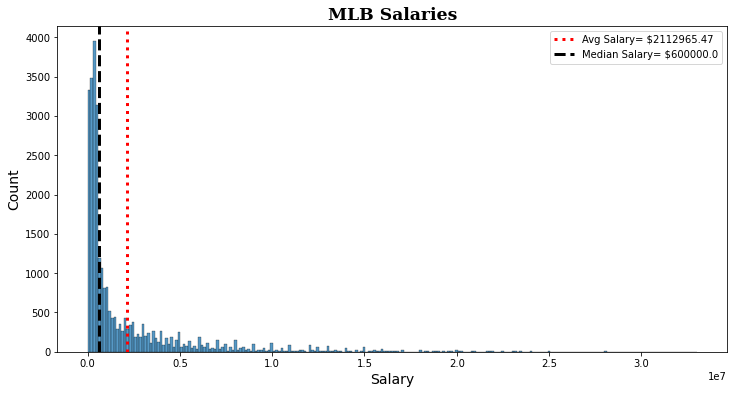

In [75]:
fig, ax = plt.subplots(figsize=(12,6))

sns.histplot(data=df, x='salary', ax=ax)
ax.set_title('MLB Salaries',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
plt.xlabel('Salary', size=14)
plt.ylabel('Count', size=14)

mean_salary = df['salary'].mean()
ax.axvline(mean_salary,color='r',ls=':',lw=3,
           label=f'Avg Salary= ${round(mean_salary,2)}');

med_salary = df['salary'].median()
ax.axvline(med_salary,color='k',ls='--',lw=3,
           label=f'Median Salary= ${round(med_salary,2)}');

ax.legend();